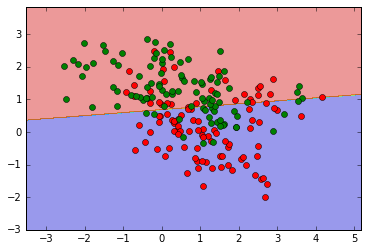

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 23 22:34:26 2016

@author: kamal
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.load("data.npy")

X,Y,y=x[:,0],x[:,1],x[:,2]
ynew=np.matrix(y).T
Xzip=zip(X,Y)
O=np.ones(x.shape[0])
Totalzip=np.matrix(zip(O,X,Y))
beta=np.linalg.inv(Totalzip.T*Totalzip)*Totalzip.T*ynew

xfit=np.linspace(-3,5,100)
finalline=(0.5-beta[0]-beta[1]*xfit)/beta[2]
#plt.plot(xfit,finalline.T)
color=['ro','go']
uniq=np.unique(y)
for i in range(2):
    index=y==uniq[i]
    plt.plot(X[index],Y[index],color[i])
    
h=0.01  
xmin,xmax=X.min()-1,X.max()+1
ymin,ymax=Y.min()-1,Y.max()+1
XX,YY=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Newone=np.ones(XX.ravel().shape)
Z=np.c_[Newone,XX.ravel(),YY.ravel()]
look=[]
label1=[]
m=Z.shape[0]
for i in range(m):
    newZ=(Z[i]*beta).item(0,0)
    if newZ<=0.5:
        label=0
    elif newZ>0.5:
        label=1
    label1.append(label)
    look.append(newZ)
    
label11=np.array(label1)
Newlabel=label11.reshape(XX.shape)
plt.contourf(XX,YY,Newlabel,alpha=0.4)